# Complicated inverse

In this notebook, we will consider the case of sampling from a Gaussian distribution $N(0,K)$ for which we know the covariance matrix $K$, but its inverse is difficult to obtain. For instance, the Metropolis-Hastings and the Gibbs sampling methods require the knowledge of the inverse of the covariance for Gaussian simulations, which exclude these methods.

In that case, we first start by assuming that the covariance matrix is actually a correlation maatrix, with solely ones on its diagonal. One can easily get that situation through diagonal linear transformations.

At step $n$, we consider a random coordinate $i_n$ and take a standard Gaussian variable $g_n$. Then we take 

$X_{n+1} = X_n + (g_n - X_n[i_n])K[:,i_n]$

where $X_n[i]$ is the $i$-th coordinate of $X_n$ and $K[:,i]$ is the $i$-th column of the matrix $K$.

We start with some imports. Numpy will be used for random simulations and matrix manipulation, matplotlib for plotting and widgets for interactivity.

In [1]:
# For mybinder, uncomment
!pip install numpy scipy matplotlib ipywidgets 

    100% |████████████████████████████████| 47.9MB 30kB/s  eta 0:00:01    91% |█████████████████████████████▍  | 44.0MB 71.2MB/s eta 0:00:01    99% |███████████████████████████████▊| 47.5MB 72.4MB/s eta 0:00:01


In [2]:
import numpy as np
from numpy.random import normal
from scipy.stats import multivariate_normal as mulnorm
import matplotlib.pyplot as plt
% matplotlib inline
% matplotlib notebook
import ipywidgets as widgets
from IPython.display import display

## Simple example

We start with an example in dimension $2$, which will illustrate the steps of the algorithm.

array([[ 1. ,  0.5],
       [ 0.5,  1. ]])

<IPython.core.display.Javascript object>


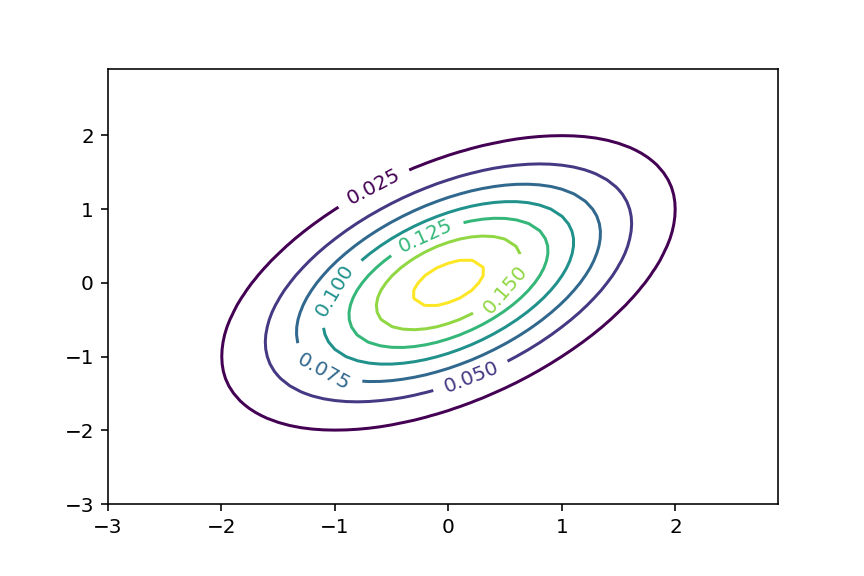

In [3]:
example_K = np.array([[1,.5],[.5,1]])
display(example_K)
x = np.arange(-3.0, 3.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.array([[mulnorm.pdf(np.array([X[i,j],Y[i,j]]),cov=example_K) for j in range(len(X[0]))] for i in range(len(X))])
fig1 = plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10);

In [5]:
def coordinateSampler(n, x0=np.zeros(2), K=example_K):
    d = len(x0)
    x = np.copy(x0)
    trajectory = [np.copy(x0)]
    i_list = np.random.randint(0,d,size=n-1)
    for i in i_list:
        g = normal()
        x += (g - x[i])*K[:,i]
        trajectory += [np.copy(x)]
    return np.array(trajectory)

In [6]:
traj = coordinateSampler(1000,K=example_K)

<IPython.core.display.Javascript object>


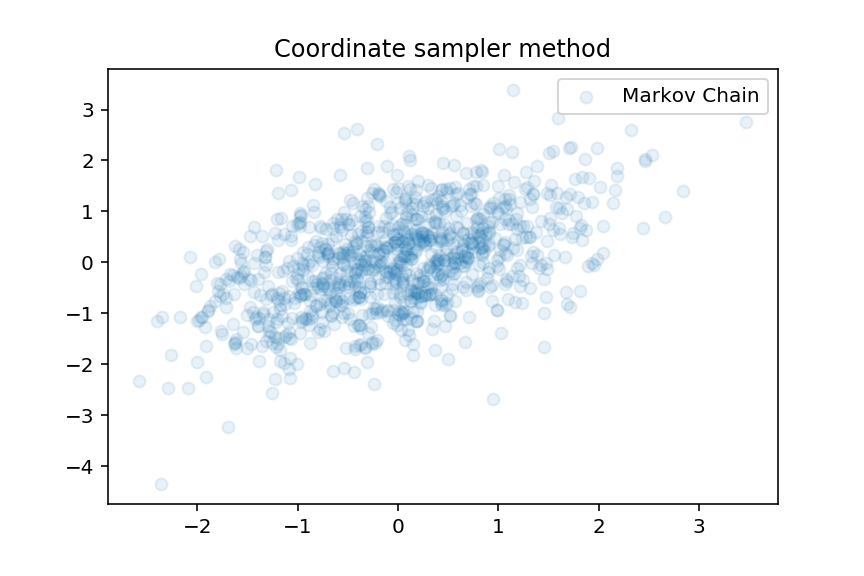

In [7]:
fig2 = plt.figure()
plt.scatter(traj[:,0],traj[:,1],alpha=.1,label='Markov Chain')
plt.legend(loc='best')
plt.title('Coordinate sampler method');

Let's see what happens step by step.

<IPython.core.display.Javascript object>


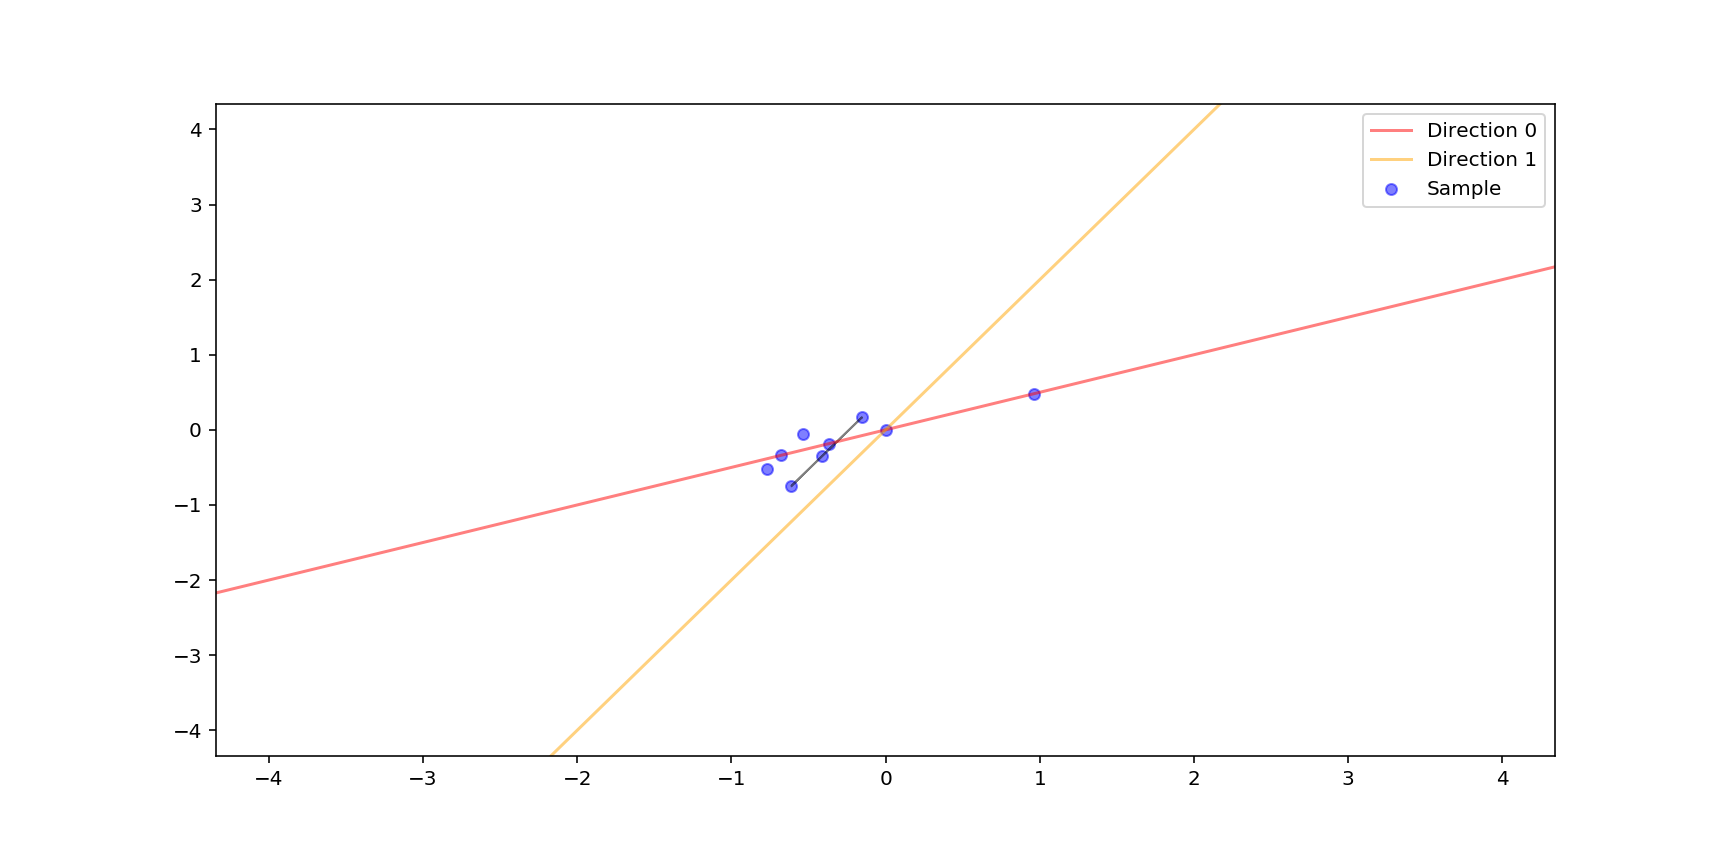

In [8]:
def start_scatter_first(trajectory,K):
    fig = plt.figure(figsize=(12,6))
    lim = np.max(np.abs(trajectory))
    plt.xlim((-lim, lim))
    plt.ylim((-lim, lim))
    alpha0 = K[1,0]/K[0,0]
    alpha1 = K[1,1]/K[0,1]
    plt.plot([-lim,lim],[-alpha0*lim,alpha0*lim],color='red',label='Direction 0',alpha=.5)
    plt.plot([-lim,lim],[-alpha1*lim,alpha1*lim],color='orange',label='Direction 1',alpha=.5)
    plt.scatter([],[],alpha=.5,label='Sample',color='blue',s=30)
    plt.legend(loc='best')
    plt.show()
    return fig

fig3 = start_scatter_first(traj,example_K)

def update_scatter_first(n,trajectory,figure):
    d = len(trajectory[0])
    t = trajectory[:n]
    plt.figure(figure.number)
    pc1,= figure.axes[0].collections
    pc1.set_offsets(t)
    
def draw_arrow(n,trajectory,figure):
    d = len(trajectory[0])
    plt.figure(figure.number)
    w = .000001
    alph=.5
    figure.axes[0].artists = []
    plt.arrow(trajectory[n-2][0],trajectory[n-2][1],trajectory[n-1][0]-trajectory[n-2][0],trajectory[n-1][1]-trajectory[n-2][1],width=w,alpha=alph)
    
    
def update_length_first(value):
    update_scatter_first(n=value['new'],trajectory=traj,figure=fig3)
    if value['new']>1:
        draw_arrow(n=value['new'],trajectory=traj,figure=fig3)
    
slider_first = widgets.IntSlider(min=0,max=100,step=1)
display(slider_first)
slider_first.observe(update_length_first,names='value')
def incrementSlider(b):
    slider_first.value += 1
advanceButton = widgets.Button(value=False,description='Advance')
display(advanceButton)
advanceButton.on_click(incrementSlider)

As you can see from the equation at the start of the notebook, each iteration is progressing in the direction of one of the columns of $K$. We have plotted the two directions in red and orange. You can observe that each change is parallel to one of the two lines. The same happens in any dimension, but it's more compicated to illustrate.